In [1]:
# import libraries

import pandas as pd
import numpy as np
import scipy.stats as st
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import seaborn as sns
import time
import datetime
import scipy.stats as st



In [2]:
# retrieving the data from xls

data = pd.read_csv('data-collection.csv')

In [3]:
data.head()

,Time,Group,Age,Confidence,Gender,Bag Size
0,10:50,1,70,95,F,Medium
1,10:52,1,60,90,F,Large
2,10:53,1,70,95,M,Small
3,10:53,1,50,95,M,Large
4,10:56,1,60,90,F,Medium


In [4]:
# loading the data into mysql

host="localhost"
port=3306
dbname="project6"
user="root"
password="1234"



engine = create_engine('mysql+mysqlconnector://{0}:{1}@{2}/{3}'
            .format(user, password,host, dbname)).connect()


In [5]:
data.to_sql('supermarket', con = engine,if_exists = 'replace')

In [6]:
# extracting the data

query = pd.read_sql_query("""SELECT * FROM supermarket;
""", engine)

data = query

In [7]:
# Data Cleaning

def agegroup(row):
    if row >= 70:
        return 'Old'
    elif row <= 30:
        return 'Young'
    else:
        return 'Middle Aged'
    

In [8]:
data['Age group'] = data['Age'].apply(agegroup)

data['Age group'].value_counts()

Middle Aged    72
Young          22
Old            19
Name: Age group, dtype: int64

In [9]:
def daytime(row):
    date_time_obj = datetime.datetime.strptime(row, '%H:%M')

    if date_time_obj <= datetime.datetime.strptime('12:00', '%H:%M'):
        return 'Morning'
    elif date_time_obj >= datetime.datetime.strptime('19:00', '%H:%M'):
        return 'Night'
    else:
        return 'Afternoon'


In [10]:
data['Time of the Day'] = data['Time'].apply(daytime)

data.head()

,index,Time,Group,Age,Confidence,Gender,Bag Size,Age group,Time of the Day
0,0,10:50,1,70,95,F,Medium,Old,Morning
1,1,10:52,1,60,90,F,Large,Middle Aged,Morning
2,2,10:53,1,70,95,M,Small,Old,Morning
3,3,10:53,1,50,95,M,Large,Middle Aged,Morning
4,4,10:56,1,60,90,F,Medium,Middle Aged,Morning


In [11]:
def group(row):
    if row > 1:
        return 'Not alone'
    else:
        return 'Alone'

In [12]:
data['Alone?'] = data['Group'].apply(group)

In [13]:
data_clean = data[['index','Alone?','Confidence','Gender','Bag Size','Age group','Time of the Day']]

In [14]:
# EDA

data_clean.dtypes

index               int64
Alone?             object
Confidence          int64
Gender             object
Bag Size           object
Age group          object
Time of the Day    object
dtype: object

In [15]:
data_clean['Gender'].value_counts()

F    70
M    43
Name: Gender, dtype: int64

In [16]:
data_clean['Bag Size'].value_counts()

Small         42
Medium        38
Large         27
Very Large     6
Name: Bag Size, dtype: int64

In [17]:
data_clean['Alone?'].value_counts()

Alone        82
Not alone    31
Name: Alone?, dtype: int64

In [18]:
data_clean.describe()

,index,Confidence
count,113.00000,113.000000
mean,56.00000,91.070796
std,32.76431,3.496725
min,0.00000,80.000000
25%,28.00000,90.000000
50%,56.00000,90.000000
75%,84.00000,95.000000
max,112.00000,99.000000


In [19]:
data_clean.groupby(['Age group','Bag Size']).agg({'Bag Size':'count'})

Bag Size
Age group   Bag Size            
Middle Aged Large             23
            Medium            23
            Small             22
            Very Large         4
Old         Large              3
            Medium             9
            Small              6
            Very Large         1
Young       Large              1
            Medium             6
            Small             14
            Very Large         1

In [20]:
data_clean.groupby(['Age group','Time of the Day']).agg({'Time of the Day':'count'})

Time of the Day
Age group   Time of the Day                 
Middle Aged Afternoon                     20
            Morning                       36
            Night                         16
Old         Afternoon                      6
            Morning                       11
            Night                          2
Young       Afternoon                      9
            Morning                        3
            Night                         10

In [21]:
data_clean.groupby(['Bag Size','Time of the Day']).agg({'Time of the Day':'count'})

Time of the Day
Bag Size   Time of the Day                 
Large      Afternoon                      6
           Morning                       12
           Night                          9
Medium     Afternoon                      9
           Morning                       17
           Night                         12
Small      Afternoon                     16
           Morning                       19
           Night                          7
Very Large Afternoon                      4
           Morning                        2

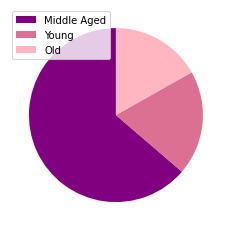

In [51]:
age_count = data_clean['Age group'].value_counts()

colors = ['purple', 'palevioletred', 'lightpink']
labels = [r'Middle Aged', r'Young', r'Old']
patches, texts = plt.pie(age_count, colors=colors, startangle=90)
plt.legend(patches, labels, loc="best")

plt.savefig('age_count.png')

plt.show()

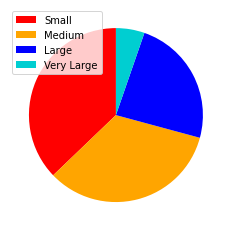

In [53]:
bag_count = data_clean['Bag Size'].value_counts()

colors = ['red', 'orange', 'blue','darkturquoise']
labels = [r'Small', r'Medium', r'Large',r'Very Large']
patches, texts = plt.pie(bag_count, colors=colors, startangle=90)
plt.legend(patches, labels, loc="best")

plt.savefig('bag_count.png')

plt.show()

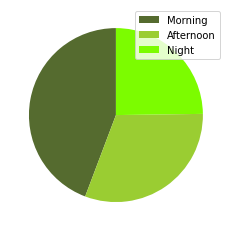

In [55]:
time_count = data_clean['Time of the Day'].value_counts()

colors = ['darkolivegreen', 'yellowgreen', 'lawngreen']
labels = [r'Morning', r'Afternoon', r'Night']
patches, texts = plt.pie(time_count, colors=colors, startangle=90)
plt.legend(patches, labels, loc="best")

plt.savefig('time_count.png')

plt.show()

In [54]:
data_clean['Time of the Day'].value_counts()

Morning      50
Afternoon    35
Night        28
Name: Time of the Day, dtype: int64

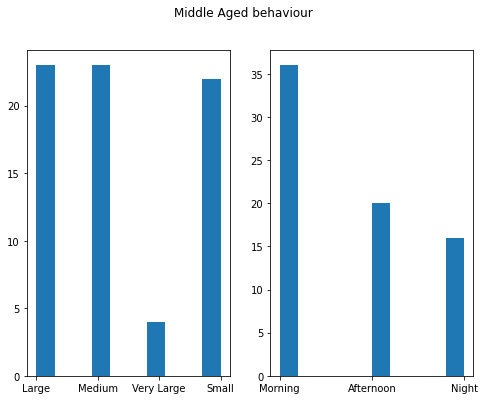

In [22]:
fig, axs = plt.subplots(1,2, figsize=(8,6))
fig.suptitle('Middle Aged behaviour')
axs[0].hist(data_clean[data_clean['Age group'] == 'Middle Aged'][['Bag Size']])
axs[1].hist(data_clean[data_clean['Age group'] == 'Middle Aged'][['Time of the Day']])

plt.show()

In [23]:
# Statistical analysis

data_clean.head()

,index,Alone?,Confidence,Gender,Bag Size,Age group,Time of the Day
0,0,Alone,95,F,Medium,Old,Morning
1,1,Alone,90,F,Large,Middle Aged,Morning
2,2,Alone,95,M,Small,Old,Morning
3,3,Alone,95,M,Large,Middle Aged,Morning
4,4,Alone,90,F,Medium,Middle Aged,Morning


In [60]:
# Contingency tables and independence of effects


# H0: u1 = equal proportions
# H1 u1 != equal proportions 

# 95% confidence


test = pd.crosstab(data['Bag Size'],data['Age group'])

print(st.chi2_contingency(np.array(test)))
table = st.chi2_contingency(np.array(test))[3]

# we cannot discard that the columns are independent

(12.499704195437499, 0.051705551650864635, 6, array([[17.20353982,  4.53982301,  5.25663717],
       [24.21238938,  6.38938053,  7.39823009],
       [26.76106195,  7.0619469 ,  8.17699115],
       [ 3.82300885,  1.00884956,  1.16814159]]))


In [61]:
display(test)
display(pd.DataFrame(table))

Age group,Middle Aged,Old,Young
Bag Size,,,
Large,23,3,1
Medium,23,9,6
Small,22,6,14
Very Large,4,1,1


,0,1,2
0,17.203540,4.539823,5.256637
1,24.212389,6.389381,7.398230
2,26.761062,7.061947,8.176991
3,3.823009,1.008850,1.168142


In [25]:
# exponential distribution to check the probabilities of demand and offer


from scipy.stats import expon

print(data[data['Time of the Day']=='Morning']['Age group'].value_counts())

# 42 minutes = 11 old
# 11/42

# 42 - 11
# 60 - x

mu = (60*11)/42

inv_lambda = 1/mu

exp_distribution = expon(scale=inv_lambda) 

print(exp_distribution.cdf(1/6))

# 42 - 3
# 60 - x

mu = (60*3)/42

inv_lamb = 1/mu

exp_distribution = expon(scale=inv_lamb)

print(exp_distribution.cdf(1/6))


# 42 - 36
# 60 - x

mu = (60*36)/42

inv_lamb = 1/mu

exp_distribution = expon(scale=inv_lamb)

print(exp_distribution.cdf(1/6))


Middle Aged    36
Old            11
Young           3
Name: Age group, dtype: int64
0.9271277680850732
0.5104583404430468
0.9998105581747672


In [26]:
test

Age group,Middle Aged,Old,Young
Bag Size,,,
Large,23,3,1
Medium,23,9,6
Small,22,6,14
Very Large,4,1,1


In [27]:
# bayes theorem (P (S|Y))
# check what is the probability of young people going shopping for few things
# and the probability of old persons going shopping for a lot of things

p_young = 22/113
p_small = 44/113

p_young_small = 14/113

p_young_given_small = p_young_small/p_small

print('The probability of the person being young given that it carries a small bag is: ' + str(p_young_given_small))

p_old = 19/113

p_very_large = 6/113

p_old_very_large = 1/113

p_old_given_very_large = p_old_very_large/p_very_large

print('The probability of the person being old given that it carries a very large bag is: ' + str(p_old_given_very_large))

The probability of the person being young given that it carries a small bag is: 0.3181818181818182
The probability of the person being old given that it carries a very large bag is: 0.16666666666666666


In [28]:
test2 = data_clean[['Bag Size','Time of the Day']]
test2

,Bag Size,Time of the Day
0,Medium,Morning
1,Large,Morning
2,Small,Morning
3,Large,Morning
4,Medium,Morning
...,...,...
108,Small,Night
109,Small,Night
110,Small,Night
111,Medium,Night


In [29]:
test2 = pd.get_dummies(test2, columns=['Time of the Day'])

test2 = test2.groupby('Bag Size').agg('sum').reset_index()

In [30]:
test2

,Bag Size,Time of the Day_Afternoon,Time of the Day_Morning,Time of the Day_Night
0,Large,6,12,9
1,Medium,9,17,12
2,Small,16,19,7
3,Very Large,4,2,0


In [31]:
# probability of small given that is morning

# probability of small given that is night

p_small = 42/113
p_morning = 50/113

p_small_morning = 19/113

p_small_given_morning = p_small_morning/p_morning

print('The probability of the person carry a small bag given that it is morning: ' + str(p_small_given_morning))

p_small = 42/113

p_night = 28/113

p_small_night = 7/113

p_small_given_night = p_small_night/p_night

print('The probability of the person carry a small bag given that is night: ' + str(p_small_given_night))

The probability of the person carry a small bag given that it is morning: 0.38
The probability of the person carry a small bag given that is night: 0.25


In [34]:
# Downloading data for Tableau

data_clean.to_csv('data_clean.csv')